In [1]:
import pandas as pd

In [2]:
# Read the August 2012 power data from the data folder
df = pd.read_csv("../data/2012-12-power-survey-london.csv")
df.head()

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,L_count,M_count,N_count,O_count,P_count,Q_count,U_count,mean,count,sigma
0,2012-12-01 00:00:00,49.712,4.840,27.291,73.613,305.244000,114.796,32.145,80.644,8.107,...,264,96,125,87,86,706,38,0.229359,4410,1011.474999
1,2012-12-01 00:30:00,42.270,3.919,24.144,61.243,334.766999,102.585,31.681,69.007,6.793,...,264,96,125,87,87,706,38,0.235855,4412,1040.591999
2,2012-12-01 01:00:00,34.621,3.012,21.683,55.938,310.025999,88.111,33.461,61.230,6.579,...,264,96,125,87,87,706,38,0.214772,4412,947.573999
3,2012-12-01 01:30:00,28.279,2.805,18.645,51.647,277.087000,81.909,29.419,54.084,5.164,...,264,96,125,87,87,706,38,0.190346,4412,839.808000
4,2012-12-01 02:00:00,30.286,2.240,16.981,45.070,255.998000,77.893,23.578,49.348,4.676,...,264,96,125,87,87,706,38,0.173234,4412,764.308001


In [3]:
from datetime import datetime
# Create two functions that will allow us to create data based on the data in each row.

def dayCalc(row):
    return pd.to_datetime(row['datetime']).day

def tstampCalc(row):
    return f"{pd.to_datetime(row['datetime']).hour}:{pd.to_datetime(row['datetime']).minute:02}"

# Create new columns for the day of the month and also a column for the time stamp (e.g. 20:30).

df['day'] = df.apply(dayCalc, axis = 1)
df['tstamp'] = df.apply(tstampCalc, axis = 1)

In [4]:
# Create a plotting function to plot the energy consumption associated with a dataframe.

def eventPlotter(dfx, title, tsb, tse):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(12,4))
    plt.plot(dfx["tstamp"],dfx["sigma"])
    plt.xticks(rotation='vertical')
    plt.title(title)
    plt.xlabel("time stamp")
    plt.ylabel("Energy Consumption (kW-h/hh")
    plt.grid()
    plt.plot([tsb, tse], [160, 160], color='r', linestyle='-', linewidth=2)
    plt.show()

In [5]:
# Create a dataframe representing energy consumption for February 11th 2012, the day
# of the England vs. Italy game.

df_England_NewZealand_12_01 = df.loc[df['day']==1]
df_England_NewZealand_12_01 = df_England_NewZealand_12_01.set_index(df_England_NewZealand_12_01["tstamp"])
df_England_NewZealand_12_01.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,N_count,O_count,P_count,Q_count,U_count,mean,count,sigma,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2012-12-01 00:00:00,49.712,4.840,27.291,73.613,305.244000,114.796,32.145,80.644,8.107,...,125,87,86,706,38,0.229359,4410,1011.474999,1,0:00
0:30,2012-12-01 00:30:00,42.270,3.919,24.144,61.243,334.766999,102.585,31.681,69.007,6.793,...,125,87,87,706,38,0.235855,4412,1040.591999,1,0:30
1:00,2012-12-01 01:00:00,34.621,3.012,21.683,55.938,310.025999,88.111,33.461,61.230,6.579,...,125,87,87,706,38,0.214772,4412,947.573999,1,1:00
1:30,2012-12-01 01:30:00,28.279,2.805,18.645,51.647,277.087000,81.909,29.419,54.084,5.164,...,125,87,87,706,38,0.190346,4412,839.808000,1,1:30
2:00,2012-12-01 02:00:00,30.286,2.240,16.981,45.070,255.998000,77.893,23.578,49.348,4.676,...,125,87,87,706,38,0.173234,4412,764.308001,1,2:00


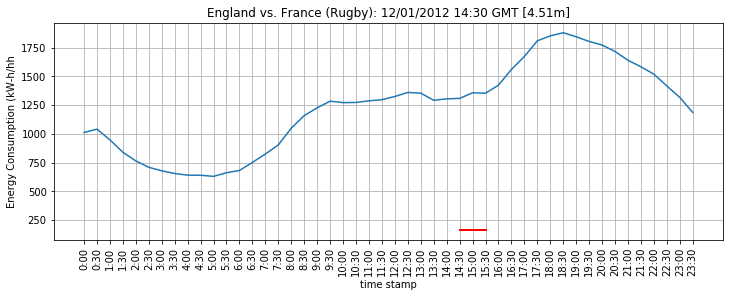

In [6]:
# Enter details for the England vs. France game, which took place on day 11
# between 15:00 and 17:00 (approx).

dfevent = df_England_NewZealand_12_01
title   = "England vs. France (Rugby): 12/01/2012 14:30 GMT [4.51m]"
tsb     = '14:30'
tse     = '15:30'

# Plot the day's energy consumption.

eventPlotter(dfevent, title, tsb, tse)